# Class Workbook

This is coding portion of your class workbook.  Please go through the sections below

## Welcome to MA679

Every module of the course will have a GitHub class that contains the chapter lab from your textbook and this application material, like your workbook/homework. You are expected to work on these materials during the class, but what you don't finish will become your homework.  At the end of each class, you must commit your work as proof of your class participation.

***

## In class activity

In [29]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
#import ISLP as islp

### Ames Housing data

In our first class, we will look at the Ames Housing data.
Please install `AmesHousing` package and look at the raw data.

In [3]:
ames_raw=pd.read_csv("ames_raw.csv")

The outcome variable of interest is `SalePrice` and you have a lot of features for each home.

A sample of them include

- `Year Built`: Original construction date
- `Lot Frontage`: Linear feet of street connected to the property
- `Lot Area`: Lot size in square feet
- `Neighborhood`: Physical locations within Ames city limits (map available)
- `Overall Qual`: Rates the overall material and finish of the house
- `Overall Cond`: Rates the overall condition of the house
- `Total Bsmt SF`: Total square feet of the basement area
- `1st Flr SF`: First Floor square feet
- `2nd Flr SF`: Second floor square feet
- `Gr Liv Area`: Above grade (ground) living area square feet
- `Bedroom`: Bedrooms above grade (does NOT include basement bedrooms)
- `Kitchen`: Kitchens above grade
- `KitchenQual`: Kitchen quality
- `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms)
- `Bsmt Full Bath`: Basement full bathrooms
- `Bsmt Half Bath`: Basement half bathrooms
- `Full Bath`: Full bathrooms above grade
- `Half Bath`: Half baths above grade, etc.

### Questions

- How many observations and features do you have in the data?

Your code:

In [7]:
ames_raw.shape

(2930, 82)

Your answer:

~~~
Please write your answer in full sentences.

There are 2930 observations and 82 features in the data.
~~~

- Please make some EDA figures to explore some of the most likely features associated with `SalePrice`.

Your code:

In [8]:
ames_raw.select_dtypes(exclude=['object'])

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2926,2927,923276100,20,NaN,8885,5,5,1983,1983,0.0,...,164,0,0,0,0,0,0,6,2006,131000
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,...,80,32,0,0,0,0,700,7,2006,132000
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,240,38,0,0,0,0,0,4,2006,170000


In [ ]:
df = ames_raw[['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'SalePrice']].copy()

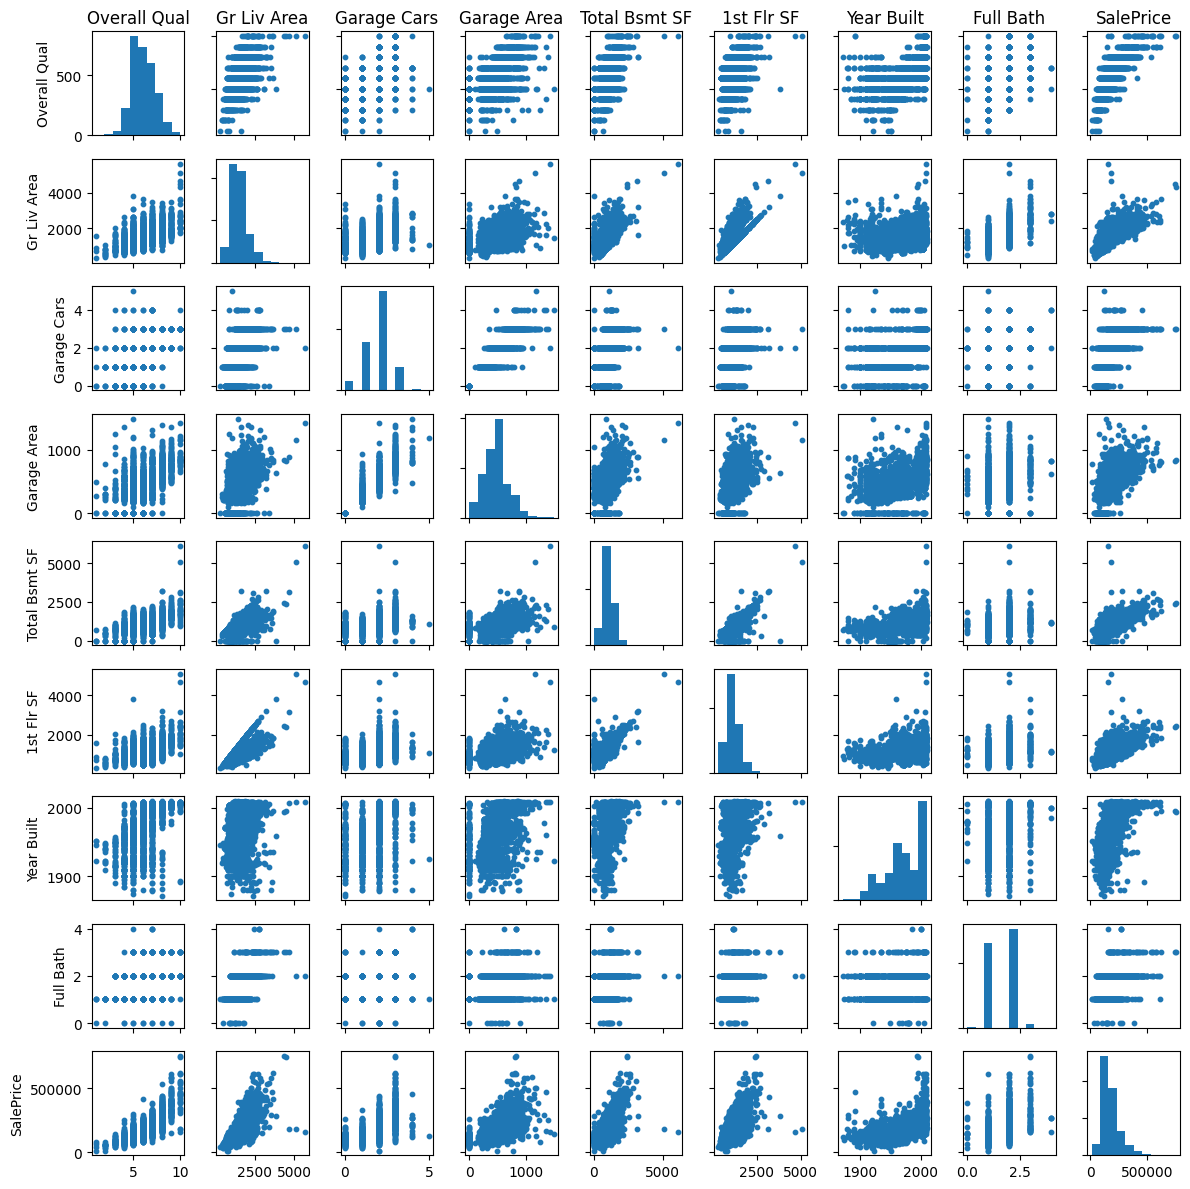

In [20]:
columns = df.columns
fig, ax = plt.subplots(len(columns), len(columns), figsize=(12, 12))

for i, row in enumerate(columns):
    for j, col in enumerate(columns):
        if i == j: 
            ax[i, j].hist(df[col])
        else:  
            ax[i, j].scatter(df[col], df[row], s=10)

        if i < len(columns) - 1: 
            ax[i, j].set_xticklabels([])
        if j > 0:
            ax[i, j].set_yticklabels([])

        if i == 0:
            ax[i, j].set_title(col)
        if j == 0:
            ax[i, j].set_ylabel(row)

plt.tight_layout()
plt.show()

Your answer:

~~~
Please write your answer in full sentences.
Variable            Correlation
Overall Qual       0.799262
Gr Liv Area        0.706780
~~~

- Are there any structures in the data?  Obvious correlations to be aware of?

Yes!

Your code:

In [11]:
ames_raw.select_dtypes(exclude=['object']).corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0

## Problem Set

### [Required] Auto Data

This exercise involves the `Auto` data set studied in the lab. Make sure that the missing values have been removed from the data.

(a) Which of the predictors are quantitative, and which are qualitative?

Your code:

In [21]:
auto = pd.read_csv("auto.csv")
auto.isna().sum()
#

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [22]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

Your answer:

~~~
Please write your answer in full sentences.

except the name variable is a qualitative predictor, the others are quantitative, due to the data type of the column.
~~~


(b) What is the range of each quantitative predictor? You can answer this using the min() and max() methods in numpy.

Your code:

In [23]:
auto.select_dtypes(exclude=['object']).apply(lambda x: x.max() - x.min())
#

mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
year              12.0
origin             2.0
dtype: float64

Your answer:

~~~
Please write your answer in full sentences.
Variable           range
mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
year              12.0
origin             2.0
~~~


(c) What is the mean and standard deviation of each quantitative predictor?

Your code:

In [24]:
auto.select_dtypes(exclude=['object']).mean()

mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
year              75.979592
origin             1.576531
dtype: float64

In [25]:
auto.select_dtypes(exclude=['object']).std()

mpg               7.805007
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
year              3.683737
origin            0.805518
dtype: float64

Your answer:

~~~
Please write your answer in full sentences.

Information shown in above.
~~~


(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

Your code:

In [26]:
trunauto = pd.concat([auto.iloc[0:9], auto.iloc[85:]])
trunauto.select_dtypes(exclude=['object']).mean()


mpg               24.404430
cylinders          5.373418
displacement     187.240506
horsepower       100.721519
weight          2935.971519
acceleration      15.726899
year              77.145570
origin             1.601266
dtype: float64

In [27]:
trunauto.select_dtypes(exclude=['object']).std()

mpg               7.867283
cylinders         1.654179
displacement     99.678367
horsepower       35.708853
weight          811.300208
acceleration      2.693721
year              3.106217
origin            0.819910
dtype: float64

Your answer:

~~~
Please write your answer in full sentences.
The answer is shown above.
~~~


(e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

Your code:

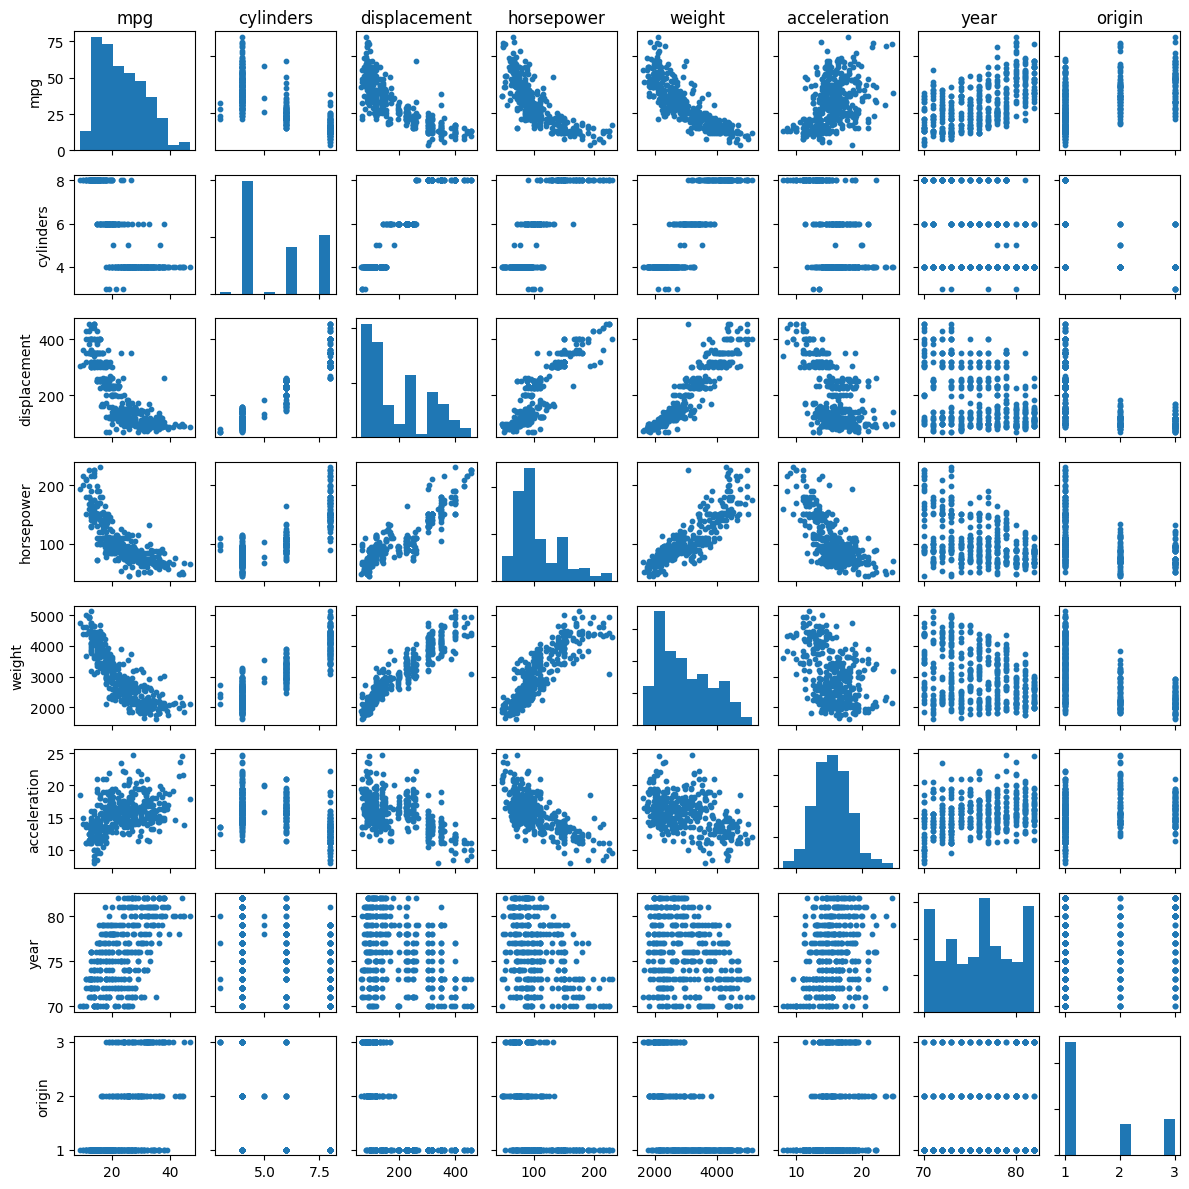

In [32]:
columns = auto.select_dtypes(exclude='object').columns
fig, ax = plt.subplots(len(columns), len(columns), figsize=(12, 12))

for i, row in enumerate(columns):
    for j, col in enumerate(columns):
        if i == j: 
            ax[i, j].hist(auto[col])
        else:  
            ax[i, j].scatter(auto[col], auto[row], s=10)

        if i < len(columns) - 1: 
            ax[i, j].set_xticklabels([])
        if j > 0:
            ax[i, j].set_yticklabels([])

        if i == 0:
            ax[i, j].set_title(col)
        if j == 0:
            ax[i, j].set_ylabel(row)

plt.tight_layout()
plt.show()

Your answer:

~~~
Please write your answer in full sentences.


~~~


(f) Suppose that we wish to predict gas mileage (mpg) based on the other variables. Do your plots suggest that any other variables might be helpful in predicting mpg? Justify your answer.

Your code:

In [37]:
auto.select_dtypes(exclude='object').corr().iloc[:,0]

mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
year            0.580541
origin          0.565209
Name: mpg, dtype: float64

Your answer:

~~~
Please write your answer in full sentences.

cylinders, displacement, horsepower, weight, these four variables have highly negative correlation. And if we look at the pair plot, we can see that on average, the four variables have an obvious trend with mpg. 
~~~

### [Optional] College Data

This exercise relates to the `College` data set, found in the file College.csv on the book website. It contains several variables for 777 different universities and colleges in the US. The
variables are

- `Private` : Public/private indicator
- `Apps` : Number of applications received
- `Accept` : Number of applicants accepted
- `Enroll` : Number of new students enrolled
- `Top10perc` : New students from the top 10% of high school class
- `Top25perc` : New students from the top 25% of high school class
- `F.Undergrad` : Number of full-time undergraduates
- `P.Undergrad` : Number of part-time undergraduates
- `Outstate` : Out-of-state tuition
- `Room.Board` : Room and board costs
- `Books` : Estimated book costs
- `Personal` : Estimated personal spending
- `PhD` : Percent of faculty with Ph.D.’s
- `Terminal` : Percent of faculty with a terminal degree
- `S.F.Ratio` : Student/faculty ratio
- `perc.alumni` : Percent of alumni who donate
- `Expend` : Instructional expenditure per student
- `Grad.Rate` : Graduation rate

Before reading the data into R, it can be viewed in Excel or a text editor.

(a) Use the pd.read_csv() function to read the data into Python. Call the loaded data college. Make sure that you have the directory set to the correct location for the data.

Your code:

In [12]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(b) Look at the data used in the notebook by creating and running a new cell with just the code college in it. You should notice that the first column is just the name of each university in a column named something like Unnamed: 0. We don’t really want pandas to treat this as data. However, it may be handy to have these names for later. Try the following commands and similarly look at the resulting data frames:

In [13]:
college2 = pd.read_csv('College.csv')#, index_col=0)
college3 = college2.rename({'Unnamed: 0': 'College'},axis=1)
college3 = college3.set_index('College')

This has used the first column in the file as an index for the data frame. This means that pandas has given each row a name corresponding to the appropriate university. Now you should see that the first data column is Private. Note that the names of the colleges appear on the left of the table. We also introduced a new python object above: a dictionary, which is specified by (key, value) pairs. Keep your modified version of the data with
the following:

In [14]:
college = college3

(c)
  Use the describe() method of to produce a numerical summary of the variables in the data set.

Your code:

In [15]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~



(d) . Use the pd.plotting.scatter_matrix() function to produce a scatterplot matrix of the first columns [Top10perc, Apps, Enroll]. Recall that you can reference a list C of columns of a data frame A using A[C].

Your code:

In [16]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(e) Use the boxplot() method of college to produce side-by-side
boxplots of Outstate versus Private.

Your code:

In [17]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(f) Create a new qualitative variable, called Elite, by binning the
Top10perc variable into two groups based on whether or not the
proportion of students coming from the top 10% of their high
school classes exceeds 50%.

In [18]:
college['Elite'] = pd.cut(college['Top10perc'], [0,0.5,1], labels=['No', 'Yes'])

Use the `value_counts()` method of `college['Elite']` to see how many elite universities there are. Finally, use the `boxplot()` method again to produce side-by-side boxplots of Outstate versus Elite.

Your code:

In [19]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(g) Use the `plot.hist()` method of college to produce some histograms with differing numbers of bins for a few of the quantitative variables. The command `plt.subplots(2, 2)` may be useful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations.

Your code:

In [20]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(h) Continue exploring the data, and provide a brief summary of what you discover.

Your code:

In [21]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~